In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
#import os
#os.listdir()
import pandas as pd
df=pd.read_csv("yield_df.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df["Area"].value_counts()

Area
India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Australia      966
              ... 
Latvia          42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

In [8]:
df["Item"].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [9]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [10]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

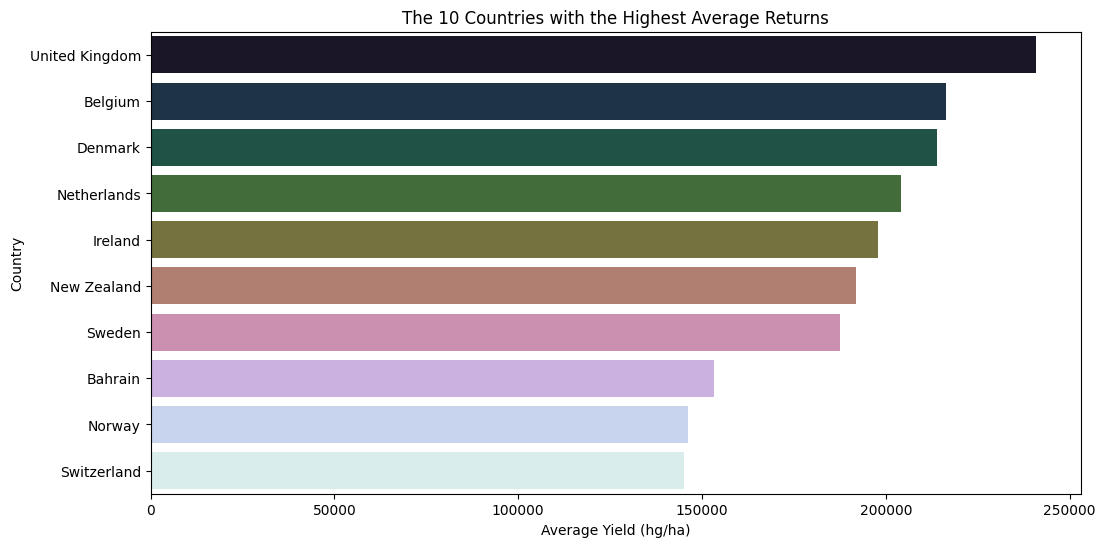

In [12]:
plt.figure(figsize=(12,6))
top_countries = (df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="cubehelix",legend=False)
plt.title("The 10 Countries with the Highest Average Returns")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Country")
plt.show()


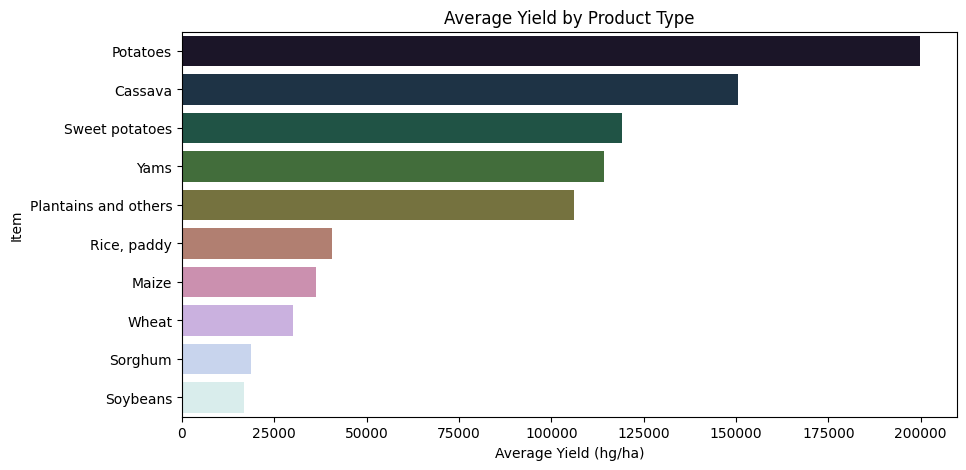

In [13]:
plt.figure(figsize=(10,5))
top_items = (df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).head(10))
sns.barplot(x=top_items.values, y=top_items.index, hue=top_items.index, palette="cubehelix",legend=False)
plt.title("Average Yield by Product Type")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Item")
plt.show()

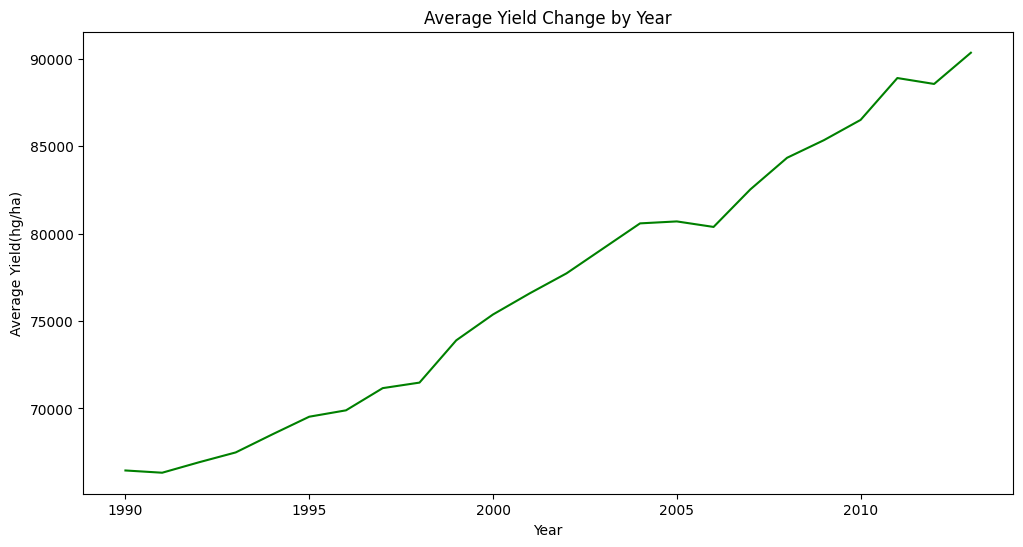

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Year", y="hg/ha_yield", errorbar=None, color="green")
plt.title("Average Yield Change by Year")
plt.xlabel("Year")
plt.ylabel("Average Yield(hg/ha)")
plt.show()

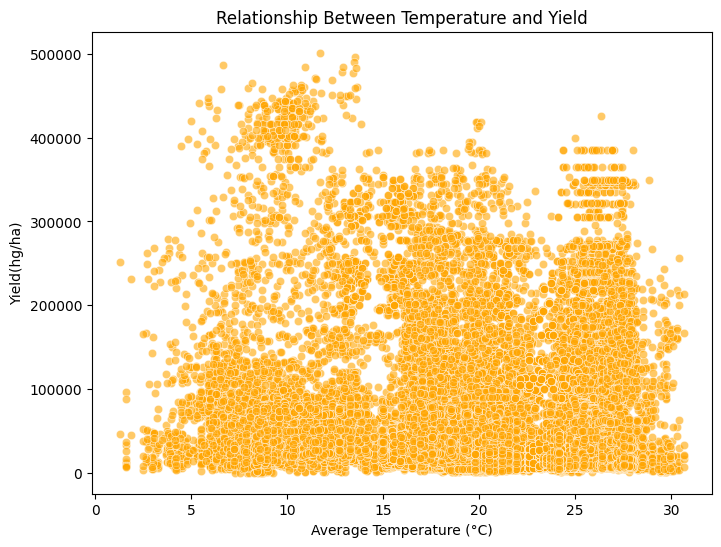

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="avg_temp", y="hg/ha_yield", alpha=0.6, color="orange")
plt.title("Relationship Between Temperature and Yield")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Yield(hg/ha)")
plt.show()

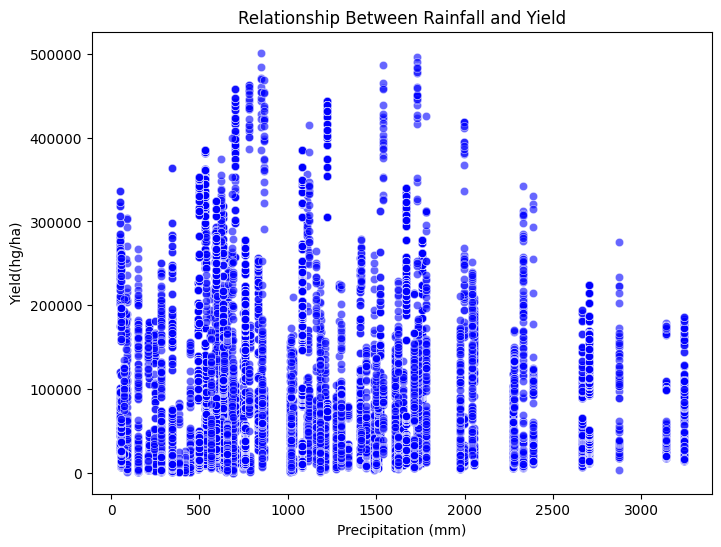

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="average_rain_fall_mm_per_year", y="hg/ha_yield", alpha=0.6, color="blue")
plt.title("Relationship Between Rainfall and Yield")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Yield(hg/ha)")
plt.show()

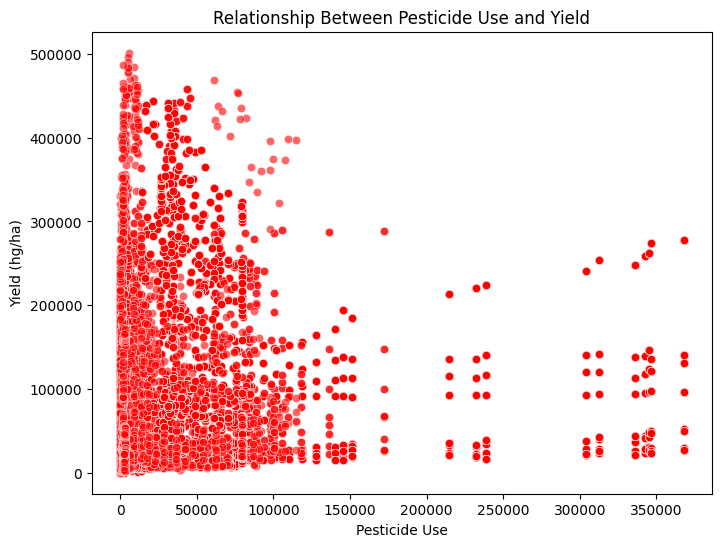

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="pesticides_tonnes", y="hg/ha_yield", alpha=0.6, color="red")
plt.title("Relationship Between Pesticide Use and Yield")
plt.xlabel("Pesticide Use")
plt.ylabel("Yield (hg/ha)")
plt.show()

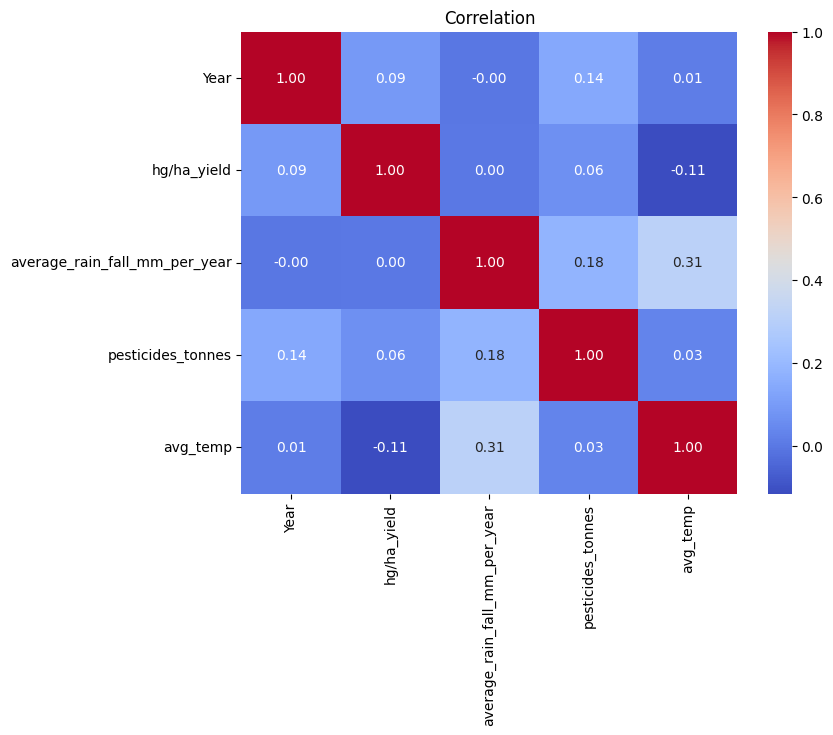

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation")
plt.show()

In [19]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [21]:
freq_columns = ['Area']
for col in freq_columns:
    
    freq = X_train[col].value_counts() / len(X_train)

    X_train[col + '_freq'] = X_train[col].map(freq)

    X_test[col + '_freq'] = X_test[col].map(freq)
    
   
    mean_freq = freq.mean()
    X_test[col + '_freq'] = X_test[col + '_freq'].fillna(mean_freq)

In [22]:
X_train.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_freq
14982,Indonesia,Cassava,2002,2702.0,1597.0,25.64,0.028782
26835,Turkey,"Rice, paddy",2002,593.0,27915.0,19.54,0.022965
3811,Brazil,Wheat,2002,1761.0,145552.0,27.85,0.081542
5578,Canada,Maize,1990,537.0,29568.0,8.20,0.020487
4603,Brazil,Wheat,2011,1761.0,345026.0,27.36,0.081542


In [23]:
X_test.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_freq
24520,Slovenia,Potatoes,2005,1162.0,1383.88,9.62,0.002782
13285,India,Sweet potatoes,2006,1083.0,37423.00,25.85,0.143356
22771,Pakistan,Wheat,2007,494.0,5935.96,19.50,0.051545
18546,Mali,Sorghum,1994,282.0,30.96,27.05,0.007132
14643,Indonesia,"Rice, paddy",1992,2702.0,825.00,27.20,0.028782


In [24]:
X_train = X_train.drop(["Area"], axis = 1)
X_test = X_test.drop(["Area"], axis = 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
onehot_columns = ['Item']
transformer = ColumnTransformer(
        transformers= [
            ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"),onehot_columns)
        ], remainder = "passthrough"
)

In [27]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [28]:
encoded_cols = transformer.get_feature_names_out()

In [29]:
encoded_cols

array(['onehot__Item_Maize', 'onehot__Item_Plantains and others',
       'onehot__Item_Potatoes', 'onehot__Item_Rice, paddy',
       'onehot__Item_Sorghum', 'onehot__Item_Soybeans',
       'onehot__Item_Sweet potatoes', 'onehot__Item_Wheat',
       'onehot__Item_Yams', 'remainder__Year',
       'remainder__average_rain_fall_mm_per_year',
       'remainder__pesticides_tonnes', 'remainder__avg_temp',
       'remainder__Area_freq'], dtype=object)

In [30]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [31]:
X_train.head()

,onehot__Item_Maize,onehot__Item_Plantains and others,onehot__Item_Potatoes,"onehot__Item_Rice, paddy",onehot__Item_Sorghum,onehot__Item_Soybeans,onehot__Item_Sweet potatoes,onehot__Item_Wheat,onehot__Item_Yams,remainder__Year,remainder__average_rain_fall_mm_per_year,remainder__pesticides_tonnes,remainder__avg_temp,remainder__Area_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0,2702.0,1597.0,25.64,0.028782
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2002.0,593.0,27915.0,19.54,0.022965
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2002.0,1761.0,145552.0,27.85,0.081542
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990.0,537.0,29568.0,8.20,0.020487
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2011.0,1761.0,345026.0,27.36,0.081542


In [32]:
X_test.head()

,onehot__Item_Maize,onehot__Item_Plantains and others,onehot__Item_Potatoes,"onehot__Item_Rice, paddy",onehot__Item_Sorghum,onehot__Item_Soybeans,onehot__Item_Sweet potatoes,onehot__Item_Wheat,onehot__Item_Yams,remainder__Year,remainder__average_rain_fall_mm_per_year,remainder__pesticides_tonnes,remainder__avg_temp,remainder__Area_freq
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0,1162.0,1383.88,9.62,0.002782
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2006.0,1083.0,37423.00,25.85,0.143356
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2007.0,494.0,5935.96,19.50,0.051545
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1994.0,282.0,30.96,27.05,0.007132
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1992.0,2702.0,825.00,27.20,0.028782


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19769 entries, 0 to 19768
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   onehot__Item_Maize                        19769 non-null  float64
 1   onehot__Item_Plantains and others         19769 non-null  float64
 2   onehot__Item_Potatoes                     19769 non-null  float64
 3   onehot__Item_Rice, paddy                  19769 non-null  float64
 4   onehot__Item_Sorghum                      19769 non-null  float64
 5   onehot__Item_Soybeans                     19769 non-null  float64
 6   onehot__Item_Sweet potatoes               19769 non-null  float64
 7   onehot__Item_Wheat                        19769 non-null  float64
 8   onehot__Item_Yams                         19769 non-null  float64
 9   remainder__Year                           19769 non-null  float64
 10  remainder__average_rain_fall_mm_pe

In [34]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [36]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [37]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  50026.64985682018
Mean Absolute Error:  32514.698841912472
R2 Score:  0.650767385889532
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  50001.8994543448
Mean Absolute Error:  32256.632599803776
R2 Score:  0.6592258195284226
-----------------------------------


Lasso
Model performance for Training Set
Root Mean Squared Error:  50026.66412134982
Mean Absolute Error:  32508.259723455543
R2 Score:  0.6507671867300959
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  50002.17868203446
Mean Absolute Error:  32250.421014490894
R2 Score:  0.6592220135188978
-----------------------------------


Ridge
Model performance for Training Set
Root Mean Squared Error:  50027.35540300587
Mean Absolute Error:  32458.607194662214
R2 Score:  0.6507575350809309
-----------------------------------
Model performance for Test Set
Root Mean Squar

In [38]:
xgboost_params = {
        "learning_rate" : [0.1, 0.01],
        "max_depth" : [5,8,12,20,30],
        "n_estimators" : [100,200,300,500],
        "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 1]
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
randomized_cv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgboost_params, cv = 5, n_jobs = -1)

In [41]:
randomized_cv.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'colsample_bytree': [0.3, 0.4, ...], 'learning_rate': [0.1, 0.01], 'max_depth': [5, 8, ...], 'n_estimators': [100, 200, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versi

In [42]:
randomized_cv.best_params_

{'n_estimators': 200,
 'max_depth': 20,
 'learning_rate': 0.1,
 'colsample_bytree': 1}

In [43]:
model = XGBRegressor(n_estimators = 500, max_depth = 12, learning_rate = 0.1, colsample_bytree = 1)

In [44]:
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,1
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [45]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

XGBoost Regressor
Model performance for Training Set
Root Mean Squared Error:  509.22651209947816
Mean Absolute Error:  221.87657165527344
R2 Score:  0.9999638199806213
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  10446.453177992998
Mean Absolute Error:  3985.77587890625
R2 Score:  0.9851258993148804
-----------------------------------


